# Lab-6 Transfer Learning with ResNet50

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle

2024-02-20 11:57:41.697836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
df = tf.keras.datasets.cifar10
df = df.load_data()
(X_train, y_train), (X_test, y_test) = df

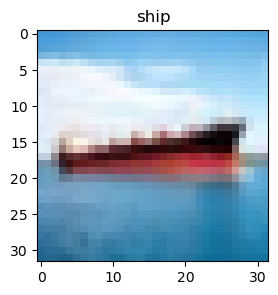

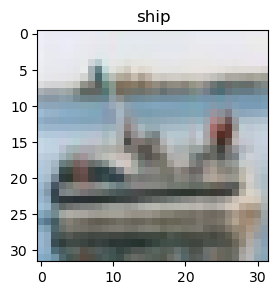

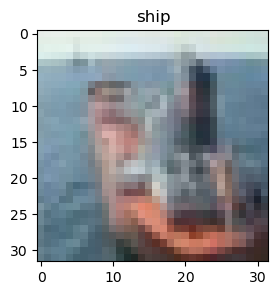

In [4]:
for i in range(3):
    plt.figure(figsize=(3, 3))
    index_random = random.randint(0, len(X_train))
    plt.title(labels[y_train[index_random][0]])
    plt.imshow(X_train[index_random])
    plt.show()

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5)

In [7]:
model_ResNet50 = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3)
)

2024-02-20 11:57:45.822550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-20 11:57:45.822596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model_ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [9]:
model = Sequential()
model.add(model_ResNet50)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,770,698
Trainable params: 24,717,578
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[lrr])

Epoch 1/10


2024-02-20 11:57:54.253606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-02-20 11:57:55.036335: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


  87/1563 [>.............................] - ETA: 3:43 - loss: 2.9165 - accuracy: 0.2410

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 17s 55ms/step - loss: 0.8185 - accuracy: 0.7636


[0.8184877634048462, 0.7635999917984009]

1/1 [==============================] - 0s 127ms/step


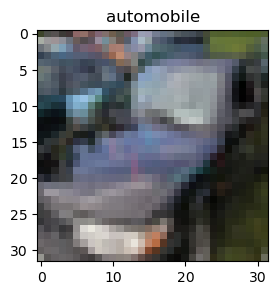

automobile
1/1 [==============================] - 0s 59ms/step


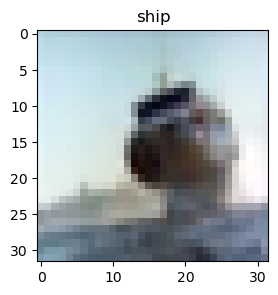

ship
1/1 [==============================] - 0s 68ms/step


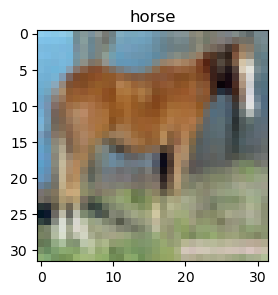

horse


In [ ]:
for i in range(3):
    index_random = random.randint(0, len(X_test))
    pred = model.predict(X_test[index_random].reshape(1, 32, 32, 3))
    plt.figure(figsize=(3, 3))
    plt.title(labels[np.argmax(y_test[index_random])])
    plt.imshow(X_test[index_random])
    plt.show()
    print(labels[pred.argmax()])